In [2]:
import pandas as pd
import numpy as np
data = pd.read_csv('covid19 cases.csv')
print(data)

         dateRep  day  month  year  cases  deaths countriesAndTerritories
0     31/05/2021   31      5  2021    366       5                 Austria
1     30/05/2021   30      5  2021    570       6                 Austria
2     29/05/2021   29      5  2021    538      11                 Austria
3     28/05/2021   28      5  2021    639       4                 Austria
4     27/05/2021   27      5  2021    405      19                 Austria
...          ...  ...    ...   ...    ...     ...                     ...
2725  06/03/2021    6      3  2021   3455      17                  Sweden
2726  05/03/2021    5      3  2021   4069      12                  Sweden
2727  04/03/2021    4      3  2021   4884      14                  Sweden
2728  03/03/2021    3      3  2021   4876      19                  Sweden
2729  02/03/2021    2      3  2021   6191      19                  Sweden

[2730 rows x 7 columns]


In [3]:
df=data.copy()
df

,dateRep,day,month,year,cases,deaths,countriesAndTerritories
0,31/05/2021,31,5,2021,366,5,Austria
1,30/05/2021,30,5,2021,570,6,Austria
2,29/05/2021,29,5,2021,538,11,Austria
3,28/05/2021,28,5,2021,639,4,Austria
4,27/05/2021,27,5,2021,405,19,Austria
...,...,...,...,...,...,...,...
2725,06/03/2021,6,3,2021,3455,17,Sweden
2726,05/03/2021,5,3,2021,4069,12,Sweden
2727,04/03/2021,4,3,2021,4884,14,Sweden
2728,03/03/2021,3,3,2021,4876,19,Sweden


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2730 entries, 0 to 2729
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   dateRep                  2730 non-null   object
 1   day                      2730 non-null   int64 
 2   month                    2730 non-null   int64 
 3   year                     2730 non-null   int64 
 4   cases                    2730 non-null   int64 
 5   deaths                   2730 non-null   int64 
 6   countriesAndTerritories  2730 non-null   object
dtypes: int64(5), object(2)
memory usage: 149.4+ KB


In [6]:
df.shape

(2730, 7)

In [7]:
df.describe()

,day,month,year,cases,deaths
count,2730.000000,2730.000000,2730.0,2730.000000,2730.000000
mean,16.000000,4.010989,2021.0,3661.010989,65.291941
std,8.765919,0.818813,0.0,6490.510073,113.956634
min,1.000000,3.000000,2021.0,-2001.000000,-3.000000
25%,8.000000,3.000000,2021.0,361.250000,2.000000
50%,16.000000,4.000000,2021.0,926.500000,14.500000
75%,24.000000,5.000000,2021.0,3916.250000,72.000000
max,31.000000,5.000000,2021.0,53843.000000,956.000000


In [8]:
df.isnull().sum()

dateRep                    0
day                        0
month                      0
year                       0
cases                      0
deaths                     0
countriesAndTerritories    0
dtype: int64

In [9]:
mean = np.mean(df)
print(mean)

day         16.000000
month        4.010989
year      2021.000000
cases     3661.010989
deaths      65.291941
dtype: float64


C:\Users\Salman\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\Users\Salman\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [10]:
std = np.std(df)
print(std)

day          8.764313
month        0.818663
year         0.000000
cases     6489.321226
deaths     113.935761
dtype: float64


C:\Users\Salman\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3571: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


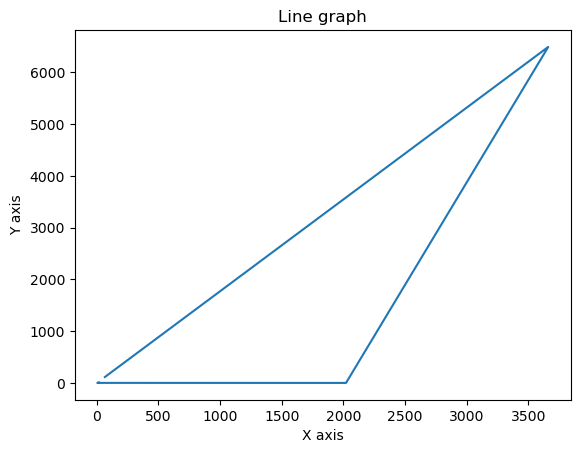

In [11]:
from matplotlib import pyplot as plt
x = mean
y = std
plt.plot(mean,std)
plt.title("Line graph")
plt.ylabel('Y axis')
plt.xlabel('X axis')
plt.show()

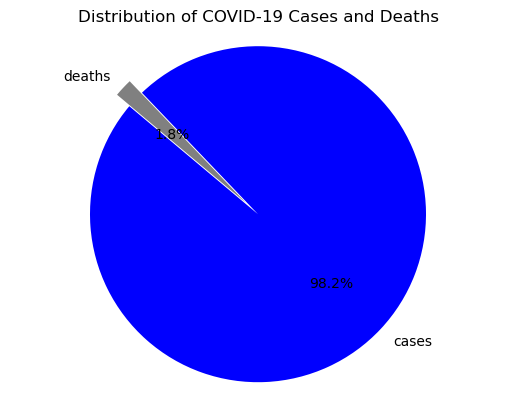

In [23]:
total_cases = df['cases'].sum()
total_deaths = df['deaths'].sum()
labels = ['cases', 'deaths']
sizes = [total_cases, total_deaths]
colors = ['blue', 'grey']
explode = (0.1, 0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Distribution of COVID-19 Cases and Deaths')
plt.show()

In [15]:
x=mean
y=std
def Pearson_correlation(X,Y):
    if len(X)==len(Y):
        Sum_xy = sum((X-X.mean())*(Y-Y.mean()))
        Sum_x_squared = sum((X-X.mean())**2)
        Sum_y_squared = sum((Y-Y.mean())**2)
        corr = Sum_xy / np.sqrt(Sum_x_squared * Sum_y_squared)
    return corr

print(Pearson_correlation(x,y))
print(Pearson_correlation(x,x))

0.8483869682687706
1.0


In [17]:
correlation = df['cases'].corr(df['deaths'])
print("Correlation between Cases and Deaths:", correlation)


Correlation between Cases and Deaths: 0.7663088786576355


In [18]:
df['Cases_Variation'] = df['cases'].pct_change() * 100
df['Deaths_Variation'] = df['deaths'].pct_change() * 100
print(df[['Cases_Variation', 'Deaths_Variation']])

      Cases_Variation  Deaths_Variation
0                 NaN               NaN
1           55.737705         20.000000
2           -5.614035         83.333333
3           18.773234        -63.636364
4          -36.619718        375.000000
...               ...               ...
2725       138.111647        -29.166667
2726        17.771346        -29.411765
2727        20.029491         16.666667
2728        -0.163800         35.714286
2729        26.968827          0.000000

[2730 rows x 2 columns]


In [27]:
df['Active_cases']=df['cases']-(df['deaths'])
df.tail()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,Cases_Variation,Deaths_Variation,Active_cases
2725,06/03/2021,6,3,2021,3455,17,Sweden,138.111647,-29.166667,3438
2726,05/03/2021,5,3,2021,4069,12,Sweden,17.771346,-29.411765,4057
2727,04/03/2021,4,3,2021,4884,14,Sweden,20.029491,16.666667,4870
2728,03/03/2021,3,3,2021,4876,19,Sweden,-0.163800,35.714286,4857
2729,02/03/2021,2,3,2021,6191,19,Sweden,26.968827,0.000000,6172


In [37]:
#pivot tabel
import pandas as pd 
countrywise_data=pd.pivot_table(df, values=['deaths',"cases","year","month","day"],index="countriesAndTerritories", aggfunc=max)
countrywise_data['Mortality Rate']=df['deaths']*100/df['cases']
countrywise_data.style.background_gradient(cmap="CMRmap")

C:\Users\Salman\anaconda3\lib\site-packages\pandas\io\formats\style.py:3931: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
C:\Users\Salman\anaconda3\lib\site-packages\pandas\io\formats\style.py:3932: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


,cases,day,deaths,month,year,Mortality Rate
countriesAndTerritories,,,,,,
Austria,4051,31,51,5,2021,nan
Belgium,6285,31,50,5,2021,nan
Bulgaria,5176,31,217,5,2021,nan
Croatia,3217,31,52,5,2021,nan
Cyprus,941,31,7,5,2021,nan
Czechia,16816,31,278,5,2021,nan
Denmark,2007,31,5,5,2021,nan
Estonia,1956,31,24,5,2021,nan
Finland,863,31,9,5,2021,nan


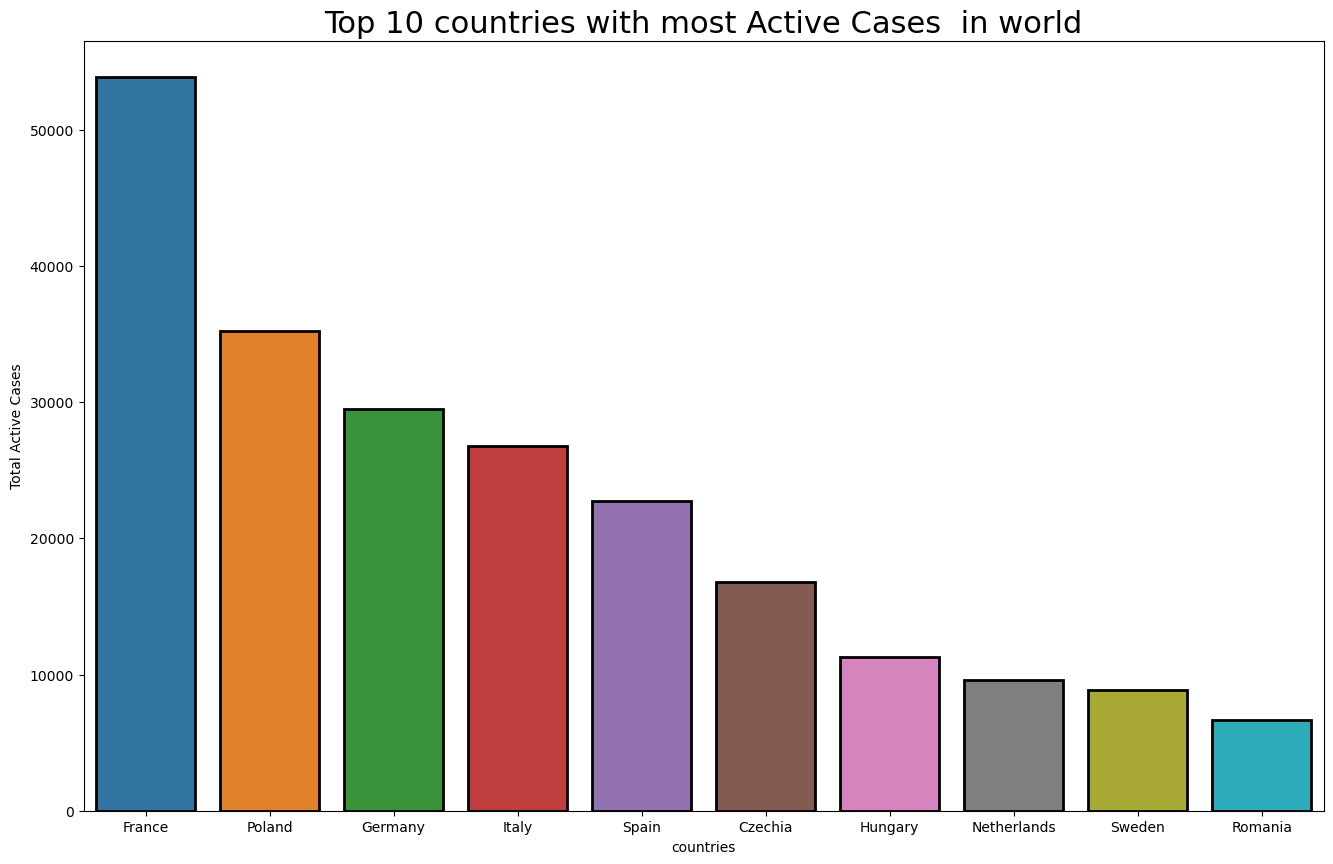

In [41]:
# top 10 active cases states
from matplotlib import pyplot as plt
import seaborn as sns
top10ActiveCases=df.groupby(by='countriesAndTerritories').max()[['cases','day']].sort_values(by=['cases'],ascending=False).reset_index()
fig=plt.figure(figsize=(16,10))
plt.title("Top 10 countries with most Active Cases  in world",size=22)
ax=sns.barplot(data=top10ActiveCases.iloc[:10],y='cases',x='countriesAndTerritories',linewidth=2,edgecolor='black')
plt.xlabel("countries")
plt.ylabel("Total Active Cases")
plt.show()

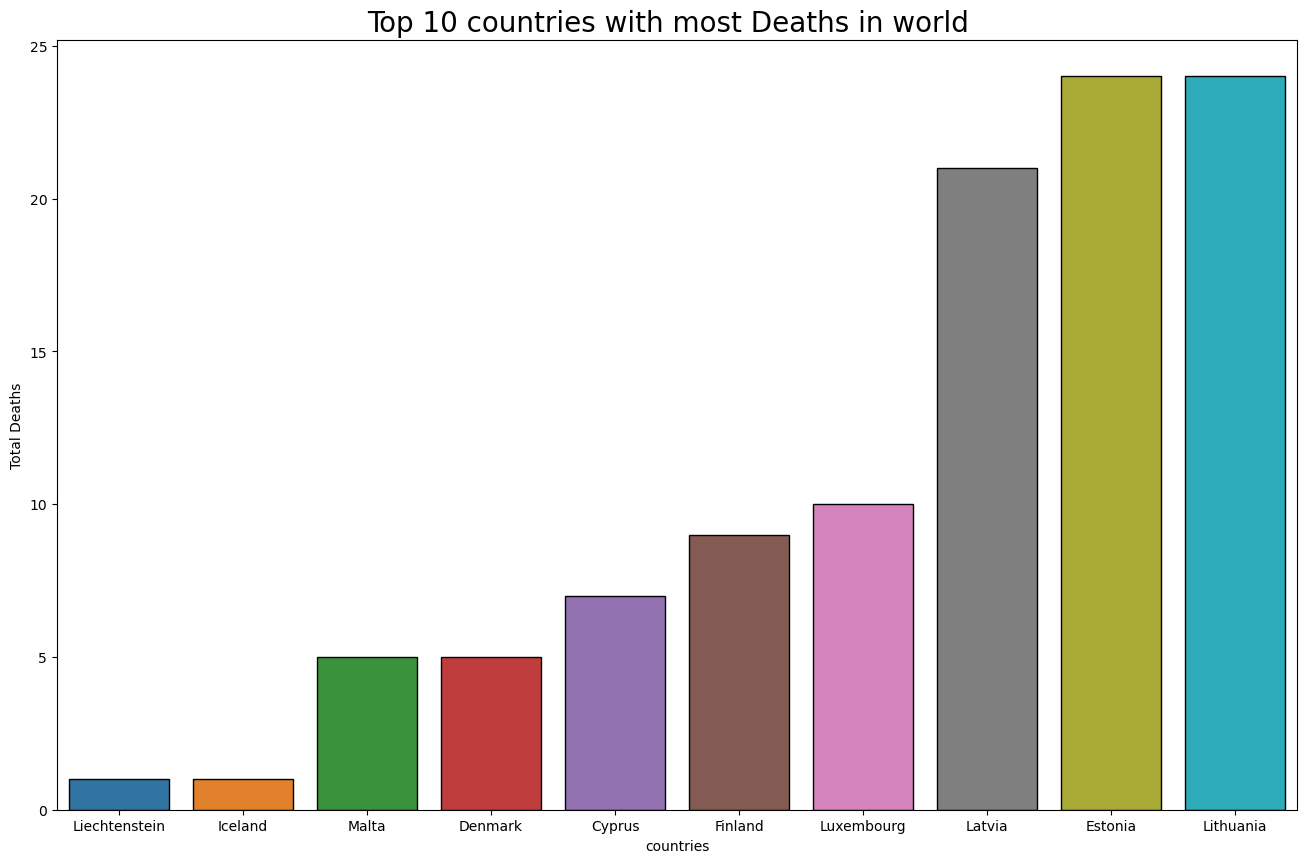

In [49]:
# top states with highest number of deaths
from matplotlib import pyplot as plt
import seaborn as sns
top10Deaths=df.groupby(by='countriesAndTerritories').max()[['deaths','day']].sort_values(by=['deaths'],ascending=True).reset_index()
fig=plt.figure(figsize=(16,10))
plt.title("Top 10 countries with most Deaths in world  ",size=20)
ax=sns.barplot(data=top10Deaths.iloc[:10],y='deaths',x='countriesAndTerritories',linewidth=1,edgecolor='black')
plt.xlabel("countries")
plt.ylabel("Total Deaths")
plt.show()

In [56]:
#!pip install plotly
import plotly.express as px
fig=px.bar(x=df.index,y=df["cases"]-df["deaths"])
fig.update_layout(title="Distribution of Number of Active Cases",
                  xaxis_title="dateRep",yaxis_title="Number of Cases",)
fig.show()
